Установим и импортируем необходимые библиотеки:

In [5]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

Загрузим данные из набора Fashion-MNIST:

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Оценим сбалансированность данных:

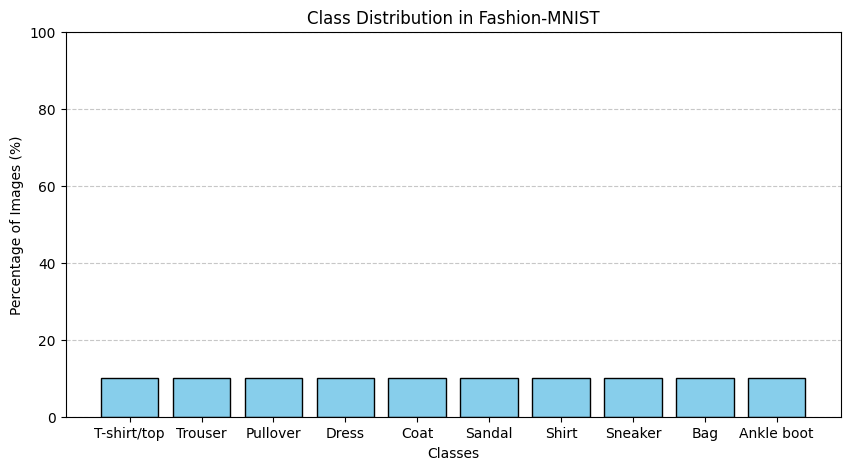

In [4]:
def plot_class_distribution(labels):
    # Подсчет количества изображений в каждом классе
    class_counts = np.bincount(labels)

    # Нормализация для получения процентного соотношения
    class_percentages = class_counts / len(labels) * 100

    plt.figure(figsize=(10, 5))
    plt.bar(range(10), class_percentages, color='skyblue', edgecolor='black')
    plt.xticks(range(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    plt.title('Class Distribution in Fashion-MNIST')
    plt.xlabel('Classes')
    plt.ylabel('Percentage of Images (%)')
    plt.ylim(0, 100)  # Установка пределов по оси Y от 0 до 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Вызов функции для отображения распределения классов
plot_class_distribution(y_train)

Нормализация данных для улучшения сходимости модели:

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Изменение формы данных для соответствия входным требованиям модели

In [7]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

Аугментация данных для увеличения разнообразия обучающего набора:

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Подгонка аугментации к обучающим данным

In [9]:
datagen.fit(x_train)

Создание модели сверточной нейронной сети:

In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 классов для классификации
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Компиляция модели с использованием оптимизатора Adam:

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Обучение модели с использованием аугментации данных:

In [12]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.5695 - loss: 1.1637 - val_accuracy: 0.7533 - val_loss: 0.6440
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.7323 - loss: 0.7059 - val_accuracy: 0.8031 - val_loss: 0.5229
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 44ms/step - accuracy: 0.7674 - loss: 0.6184 - val_accuracy: 0.8188 - val_loss: 0.4876
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 42ms/step - accuracy: 0.7881 - loss: 0.5669 - val_accuracy: 0.8140 - val_loss: 0.5009
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8015 - loss: 0.5305 - val_accuracy: 0.8353 - val_loss: 0.4516
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8076 - loss: 0.5104 - val_accuracy: 0.8470 - val_loss: 0.4119
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.8203 - loss: 0.4844 - val_accuracy: 0.8380 - val_loss: 0.4385
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8215 - loss: 0.4

Оценка модели на тестовом наборе:

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 3s - 10ms/step - accuracy: 0.8720 - loss: 0.3570

Test accuracy: 0.8720


Визуализация графиков обучения:

In [14]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

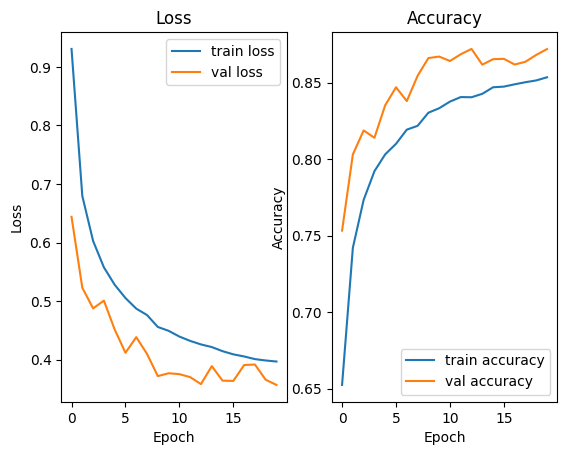

In [15]:
# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Прогнозирование на тестовом наборе:

In [16]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Функция для отображения изображений и их предсказаний:

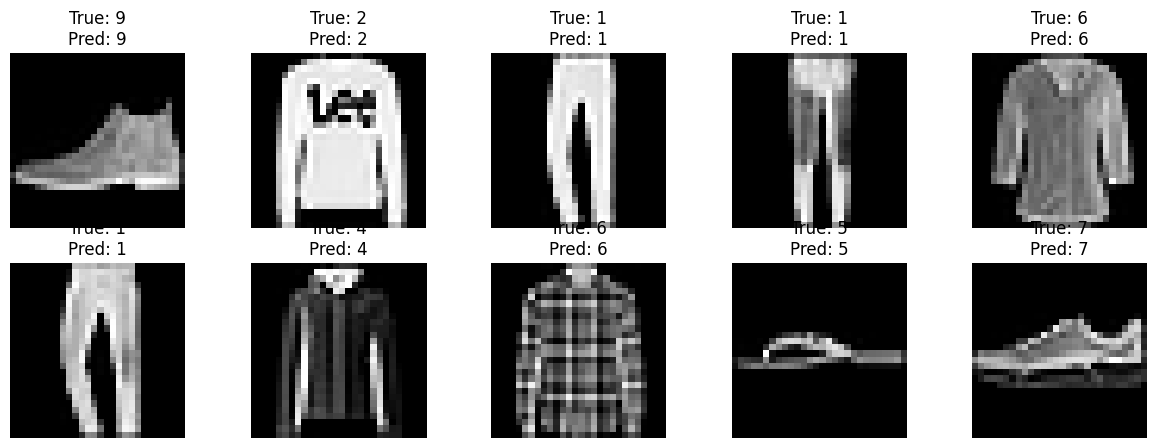

In [17]:
def plot_predictions(images, true_labels, predictions, num=10):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPred: {np.argmax(predictions[i])}')
        plt.axis('off')
    plt.show()

# Отображение первых 10 изображений из тестового набора
plot_predictions(x_test, y_test, predictions, num=10)

Альтернативная архитектура нейронной сети:

In [18]:
model2 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Дропаут для борьбы с переобучением
    layers.Dense(10, activation='softmax')
])

# Компиляция и обучение второй модели
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=32),
                       epochs=20,
                       validation_data=(x_test, y_test))

# Оценка второй модели
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy of model 2: {test_acc2:.4f}')

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 169s 89ms/step - accuracy: 0.4315 - loss: 1.5031 - val_accuracy: 0.7264 - val_loss: 0.6942
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 89ms/step - accuracy: 0.6726 - loss: 0.8749 - val_accuracy: 0.7459 - val_loss: 0.6548
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 89ms/step - accuracy: 0.7089 - loss: 0.7652 - val_accuracy: 0.7852 - val_loss: 0.5466
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 168s 89ms/step - accuracy: 0.7432 - loss: 0.6888 - val_accuracy: 0.8014 - val_loss: 0.5051
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 89ms/step - accuracy: 0.7613 - loss: 0.6423 - val_accuracy: 0.7969 - val_loss: 0.5157
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 89ms/step - accuracy: 0.7730 - loss: 0.6121 - val_accuracy: 0.8106 - val_loss: 0.4822
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 88ms/step - accuracy: 0.7774 - loss: 0.6033 - val_accuracy: 0.8370 - val_loss: 0.4404
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 165s 88ms/step - accuracy: 

Визуализация графиков обучения:

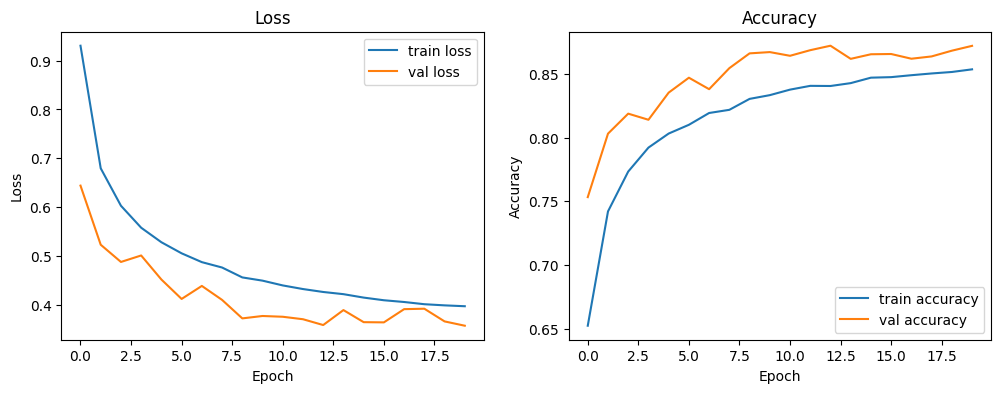

In [19]:
plt.figure(figsize=(12, 4))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Прогнозирование на тестовом наборе для второй модели:

In [20]:
predictions2 = model2.predict(x_test)
predicted_classes2 = np.argmax(predictions2, axis=1)

# Отчет о классификации
print(classification_report(y_test, predicted_classes2, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.81      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.79      0.83      0.81      1000
       Dress       0.88      0.86      0.87      1000
        Coat       0.80      0.78      0.79      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.63      0.59      0.61      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

